In [1]:
# filename: model_visualization.py

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, classification_report, average_precision_score


# 1. Load sample binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
# 3. Train Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
y_prob_log = logreg.predict_proba(X_test)[:, 1]

# 4. Train Random Forest for comparison
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

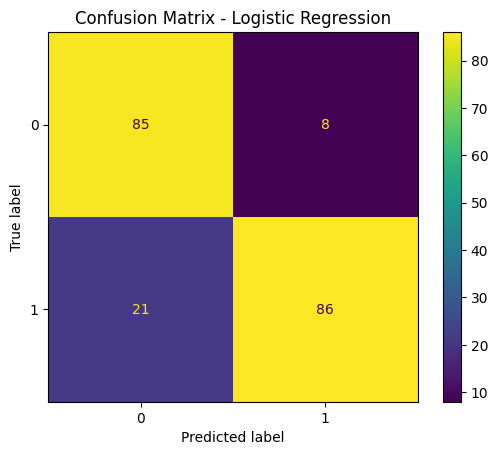

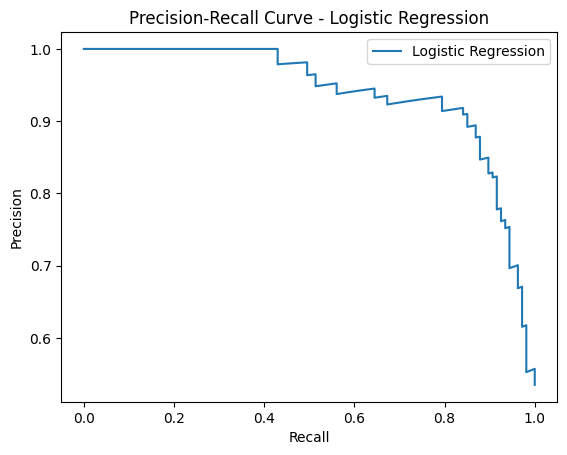

In [3]:
# 5. Plot Confusion Matrix (Logistic Regression)
cm = confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.savefig("results/confusion_matrix_logreg.png")
plt.show()

# 6. Plot Precision-Recall Curve (Logistic Regression)
precision, recall, _ = precision_recall_curve(y_test, y_prob_log)
plt.plot(recall, precision, label="Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression")
plt.legend()
plt.savefig("results/precision_recall_logreg.png")
plt.show()

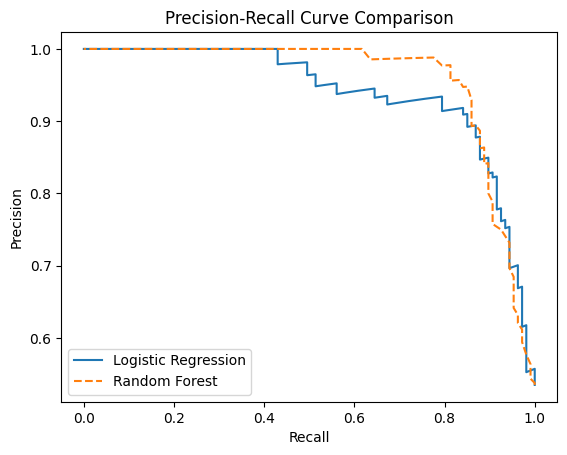

In [4]:
# 7. Compare Precision-Recall Curve (LogReg vs Random Forest)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)

plt.plot(recall, precision, label="Logistic Regression")
plt.plot(recall_rf, precision_rf, label="Random Forest", linestyle="--")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.savefig("results/precision_recall_comparison.png")
plt.show()

In [5]:
# 8. Print classification reports
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200

Random Forest Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.89        93
           1       0.95      0.85      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



In [6]:
# 9. Decide the better model
log_ap = average_precision_score(y_test, y_prob_log)
rf_ap = average_precision_score(y_test, y_prob_rf)
print(f"Avg Precision - Logistic Regression: {log_ap:.3f}")
print(f"Avg Precision - Random Forest: {rf_ap:.3f}")

if log_ap > rf_ap:
    print("🔍 Logistic Regression performed better.")
else:
    print("🔍 Random Forest performed better.")

Avg Precision - Logistic Regression: 0.939
Avg Precision - Random Forest: 0.956
🔍 Random Forest performed better.
